Import relevant libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sn

Load data out of Zip file

In [50]:
file_name = "digit-recognizer.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [51]:
d0 = pd.read_csv('train.csv')

# Print first 2 rows
print(d0.head(2))

l = d0['label']

d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 785 columns]


In [52]:
labels = l
data = d

Standardize the data

In [53]:
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

sample_data = standardized_data

(42000, 784)


initializing PCA

In [54]:
pca = decomposition.PCA()

configuring the number of components

In [55]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("shape of reduced data: ", pca_data.shape)

shape of reduced data:  (42000, 2)


Determine the loss for PCA

In [56]:
invers = pca.inverse_transform(pca_data)

X_projected2 = pca_data.dot(pca.components_) + pca.mean_

loss = np.sum((data - invers) ** 2, axis=1).mean()

print(loss)

5716956.832893658


Prepare Data for plotting

In [57]:
# Add label for the 2-d data points
pca_data = np.vstack((pca_data.T, labels)).T

# Create a new data fram for plotting
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

Plot the 2d data points

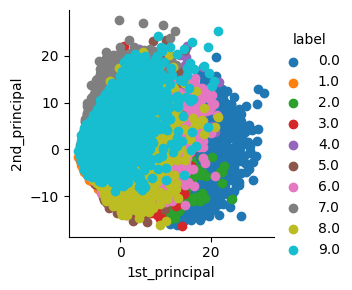

In [58]:
sn.FacetGrid(pca_df, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()